# R.M.S. TITANIC CASE STUDY

### [1. Read the data](#Read-the-data)

### [2. Data Exploration](#Data-Exploration)

### [3. Feature Engineering](#Feature-Engineering)
#### [----- 3.1 Missing Value treatment](#Missing-value-treatment)

### [4. Train Test Split](#Train-Test-Split)

### [5. Build Machine Learning models for cross validation](#Build-Machine-Learning-models-for-cross-validation)
#### [----- 5.1 Check cross validation score](#Check-cross-validation-score)
#### [----- 5.2 Feature importance](#Feature-importance)

### [6. Model Performance Metrics(Before tuning)](#Model-Performance-Metrics(Before-tuning))

### [7. Hyperparameter tuning](#Hyperparameter-Tuning)
#### [----- 7.1 Fit the model with best parameters](#Fit-the-model-with-best-parameters)

### [8. Model Performance Metrics(After tuning)](#Model-Performance-Metrics(After-tuning))

### [9. Summary](#Summary)

In [11]:
# Import the libraries
import pandas as pd
import numpy as np
import pandas_profiling

### Read the data

In [12]:
titanic = pd.read_csv('D:/IMS Proschool/Business Analytics/Project/train.csv')

In [ ]:
titanic.profile_report()

In [14]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Find the percentage of missing data per column

total = titanic.isna().sum().sort_values(ascending=False)
perc = titanic.isna().sum()/titanic.isna().count()*100
percent = (round(perc, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])

In [16]:
missing_data.head()

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00


In [17]:
mean_age = titanic.Age.mean()
std_age = titanic.Age.std()
total_null = titanic.Age.isna().sum()

In [18]:
# compute random numbers between the mean and std, with size as total_isna
random_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = total_null)

In [19]:
# fill NA values in Age column with random values generated
age_temp = titanic['Age'].copy()
age_temp[np.isnan(age_temp)] = random_age
titanic['Age'] = age_temp

In [21]:
# convert data type of age to int
titanic['Age'] = titanic['Age'].astype(int)

In [22]:
titanic.Embarked.mode()

0    S
dtype: object

In [23]:
# fill NA values in column Embarked with mode
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace=True)

In [24]:
#drop because not needed
titanic = titanic.drop(['PassengerId','Ticket','Cabin'], axis=1)

In [25]:
#check there are no missing values in the data
titanic.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
# convert data type of Fare to int
titanic['Fare'] = titanic['Fare'].astype(int)

In [27]:
#extract title from column name and assign it to a new categorical column named Title

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Misc": 5}

# extract titles
titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# replace titles with Misc
titanic['Title'] = titanic['Title'].replace(['Dr','Rev','Major','Col','Lady','Jonkheer','Don','Countess','Capt','Sir'], 'Misc')

# Mlle in short for Mademoiselle given to unmarried woman, replace it with Miss
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')

# Ms is short for Miss
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')

# Mme is short for Madame, replace it with Mrs
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

In [28]:
#check values of Title columns

titanic['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Misc       23
Name: Title, dtype: int64

In [29]:
# drop the column Name as we have extracted the titles from it

titanic = titanic.drop(['Name'], axis=1)

In [31]:
#check if the data is ready for transformation

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
Embarked    891 non-null object
Title       891 non-null object
dtypes: int32(2), int64(4), object(3)
memory usage: 55.8+ KB


In [32]:
#convert all columns to numerical

titanic_num = titanic[titanic.select_dtypes(include=[np.number]).columns.tolist()]

In [33]:
titanic_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22,1,0,7
1,1,1,38,1,0,71
2,1,3,26,0,0,7
3,1,1,35,1,0,53
4,0,3,35,0,0,8


In [34]:
# create dummies for categorical data columns so that all the columns are numerical

titanic_cat = pd.get_dummies(titanic[titanic.select_dtypes(include='object').columns.tolist()])
titanic_cat.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,0,1,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,0,1,0


In [35]:
# merge all the numerical columns

titanic_com = pd.concat([titanic_num, titanic_cat], axis=1)
titanic_com.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,0,3,22,1,0,7,0,1,0,0,1,0,0,0,1,0
1,1,1,38,1,0,71,1,0,1,0,0,0,0,0,0,1
2,1,3,26,0,0,7,1,0,0,0,1,0,0,1,0,0
3,1,1,35,1,0,53,1,0,0,0,1,0,0,0,0,1
4,0,3,35,0,0,8,0,1,0,0,1,0,0,0,1,0


In [36]:
titanic_com.shape

(891, 16)

In [37]:
# Seperate the predictors and the target variable

X = titanic_com.drop(['Survived'], axis=1)
y = titanic_com['Survived']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### We wil use X_train and y_train for cross validation and fit our selected model of X_test and y_test later

In [39]:
# build ML models for cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [40]:
# create objects of the model classifiers

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=10)
nb = GaussianNB()

In [41]:
# check cross validation scores (accuracy) for all the models

from sklearn.model_selection import cross_val_score

lr_score = cross_val_score(lr, X_train, y_train, cv=4, scoring='accuracy')
dt_score = cross_val_score(dt, X_train, y_train, cv=4, scoring='accuracy')
rf_score = cross_val_score(rf, X_train, y_train, cv=4, scoring='accuracy')
knn_score = cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy')
nb_score = cross_val_score(nb, X_train, y_train, cv=4, scoring='accuracy')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
# print the scores

print('Logistic Regression: ',lr_score)
print('Decision Tree: ',dt_score)
print('Random Forest: ',rf_score)
print('K Nearest Neighbors: ',knn_score)
print('Naive Bayes: ',nb_score)

Logistic Regression:  [0.80446927 0.83146067 0.86516854 0.84180791]
Decision Tree:  [0.73184358 0.76966292 0.7752809  0.80225989]
Random Forest:  [0.75977654 0.78651685 0.84831461 0.84745763]
K Nearest Neighbors:  [0.69832402 0.65730337 0.65168539 0.75706215]
Naive Bayes:  [0.78212291 0.79775281 0.80898876 0.81920904]


In [43]:
#check the mean and standard deviation of the scores to select the best model

#mean
l = lr_score.mean()
d = dt_score.mean()
r = rf_score.mean()
k = knn_score.mean()
n = nb_score.mean()

# stdev
l_s = lr_score.std()
d_s = dt_score.std()
r_s = rf_score.std()
k_s = knn_score.std()
n_s = nb_score.std()

In [45]:
# print the results in a tabular form

res = pd.DataFrame(
        {
        'Model':['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbors','Naive Bayes'],
        'Accuracy':[l,d,r,k,n],
        'Stdev':[l_s, d_s, r_s, k_s, n_s]
        }   )
average_scores = res.sort_values(by='Accuracy', ascending=False)
average_scores

,Model,Accuracy,Stdev
0,Logistic Regression,0.835727,0.021789
2,Random Forest,0.810516,0.038548
4,Naive Bayes,0.802018,0.013767
1,Decision Tree,0.769762,0.025122
3,K Nearest Neighbors,0.691094,0.042128


#### As we can see that Logistic Regression has the best accuracy scores, we will select Logistic Regression Classifier for our problem

In [46]:
lr.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
lr.coef_

array([[-0.98886853, -0.01898438, -0.53324473, -0.2238927 ,  0.00359945,
         1.6029924 ,  0.06794781,  0.71646731,  0.62377128,  0.33070162,
         2.20999458, -0.62136232,  0.28601898, -1.11220845,  0.90849742]])

In [48]:
X_train.shape

(712, 15)

In [51]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc',
       'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [52]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':lr.coef_})
#importances = importances.sort_values('importance',ascending=False).set_index('feature')

Exception: Data must be 1-dimensional

In [55]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
lr.coef_

array([[-0.98886853, -0.01898438, -0.53324473, -0.2238927 ,  0.00359945,
         1.6029924 ,  0.06794781,  0.71646731,  0.62377128,  0.33070162,
         2.20999458, -0.62136232,  0.28601898, -1.11220845,  0.90849742]])

In [56]:
rf.feature_importances_

array([0.0904178 , 0.25975551, 0.05443873, 0.03171192, 0.17185908,
       0.07799337, 0.09625423, 0.01082432, 0.00977738, 0.01558122,
       0.01802764, 0.00636061, 0.02132275, 0.10127024, 0.03440521])

In [58]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':rf.feature_importances_})

In [59]:
importances = importances.sort_values('importance',ascending=False).set_index('feature')

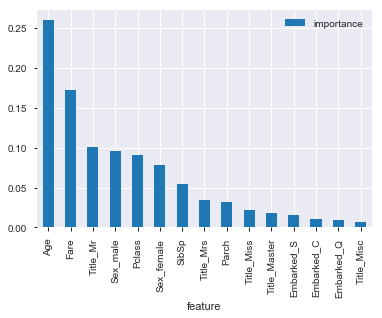

In [60]:
importances.plot.bar()

In [91]:
lr.coef_

array([[-0.98886853, -0.01898438, -0.53324473, -0.2238927 ,  0.00359945,
         1.6029924 ,  0.06794781,  0.71646731,  0.62377128,  0.33070162,
         2.20999458, -0.62136232,  0.28601898, -1.11220845,  0.90849742]])

In [92]:
lr.coef_[0]

array([-0.98886853, -0.01898438, -0.53324473, -0.2238927 ,  0.00359945,
        1.6029924 ,  0.06794781,  0.71646731,  0.62377128,  0.33070162,
        2.20999458, -0.62136232,  0.28601898, -1.11220845,  0.90849742])

In [93]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':lr.coef_[0]})

In [94]:
importances = importances.sort_values('importance',ascending=False).set_index('feature')

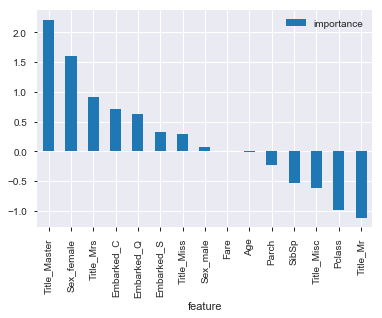

In [95]:
importances.plot.bar()

In [96]:
importances

,importance
feature,
Title_Master,2.209995
Sex_female,1.602992
Title_Mrs,0.908497
Embarked_C,0.716467
Embarked_Q,0.623771
Embarked_S,0.330702
Title_Miss,0.286019
Sex_male,0.067948
Fare,0.003599


In [97]:
y_pred = lr.predict(X_test)

In [98]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.81      0.68      0.74        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [114]:
y_pred2 = rf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       106
           1       0.74      0.70      0.72        73

   micro avg       0.78      0.78      0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [115]:
roc_score2 = roc_auc_score(y_test, y_pred2)
roc_score2

0.7644094081157923

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score

In [101]:
roc_score = roc_auc_score(y_test, y_pred)

In [134]:
roc_score = np.round(roc_score,3)
roc_score

0.786

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

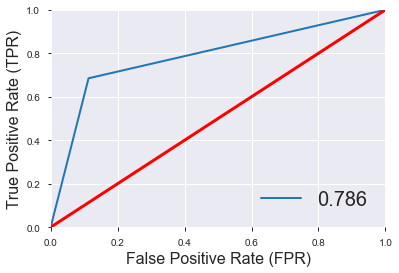

In [131]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, linewidth=2, label=roc_score)
plt.plot([0, 1], [0, 1], 'r', linewidth=3)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.legend(loc='lower right', prop={'size':20})
plt.show()

In [132]:
y_pred_proba = lr.predict_proba(X_test)

In [133]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.7858619798397519

In [136]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [149]:
X_train_copy = X_train.drop(['Fare'], axis=1)
lr2 = LogisticRegression()

In [150]:
lr2.fit(X_train_copy,y_train_copy)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [146]:
X_test_copy = X_test.drop(['Fare'], axis=1)

In [151]:
y_pred3 = lr2.predict(X_test_copy)

In [152]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       106
           1       0.79      0.68      0.74        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [153]:
roc3 = roc_auc_score(y_test, y_pred3)
roc3

0.7811449987076765

In [159]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
301,3,17,2,0,23,0,1,0,1,0,0,0,0,1,0
309,1,30,0,0,56,1,0,1,0,0,0,0,1,0,0
516,2,34,0,0,10,1,0,0,0,1,0,0,0,0,1
120,2,21,2,0,73,0,1,0,0,1,0,0,0,1,0
570,2,62,0,0,10,0,1,0,0,1,0,0,0,1,0


In [160]:
y_train.head()

301    1
309    1
516    1
120    0
570    1
Name: Survived, dtype: int64

In [168]:
X_train2 = X_train.copy()
y_train2 = y_train.copy()
X_test2 = X_test.copy()
y_test2 = y_test.copy()

In [154]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [155]:
lr_temp = LogisticRegression(solver='liblinear')

In [156]:
param1 = {  'penalty' : ['l1', 'l2'],
            'C' : np.logspace(-4, 4, 20)}

param2 = {  'penalty' : ['l1', 'l2'],
            'C' : np.logspace(0, 4, 10)}

In [190]:
print(np.logspace(-4, 4, 20))

[1.00000000e-04 2.63665090e-04 6.95192796e-04 1.83298071e-03
 4.83293024e-03 1.27427499e-02 3.35981829e-02 8.85866790e-02
 2.33572147e-01 6.15848211e-01 1.62377674e+00 4.28133240e+00
 1.12883789e+01 2.97635144e+01 7.84759970e+01 2.06913808e+02
 5.45559478e+02 1.43844989e+03 3.79269019e+03 1.00000000e+04]


In [191]:
print(np.logspace(0, 4, 10))

[1.00000000e+00 2.78255940e+00 7.74263683e+00 2.15443469e+01
 5.99484250e+01 1.66810054e+02 4.64158883e+02 1.29154967e+03
 3.59381366e+03 1.00000000e+04]


In [192]:
np.arange(4, 20, 3)

array([ 4,  7, 10, 13, 16, 19])

In [194]:
np.arange(0.1, 10, 0.05)

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15,
       1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 ,
       1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25,
       2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75, 2.8 ,
       2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 , 3.35,
       3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85, 3.9 ,
       3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 , 4.45,
       4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95, 5.  ,
       5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45, 5.5 , 5.55,
       5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  , 6.05, 6.1 ,
       6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55, 6.6 , 6.65,
       6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 , 7.15, 7.2 ,
       7.25, 7.3 , 7.35, 7.4 , 7.45, 7.5 , 7.55, 7.

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
clf1 = GridSearchCV(lr_temp, param1, cv=5, verbose=True)

In [163]:
best_clf1 = clf1.fit(X_train2, y_train2)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.3s finished


In [164]:
# View best hyperparameters
print('Best Penalty:', best_clf1.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf1.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.615848211066026


In [183]:
clf1.best_params_

{'C': 0.615848211066026, 'penalty': 'l2'}

In [165]:
clf2 = GridSearchCV(lr_temp, param2, cv=5, verbose=True)

In [166]:
best_clf2 = clf2.fit(X_train2, y_train2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


In [167]:
# View best hyperparameters
print('Best Penalty:', best_clf2.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf2.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [170]:
y_pred_clf1 = clf1.predict(X_test2)
print(classification_report(y_test2, y_pred_clf1))
roc_clf1 = roc_auc_score(y_test2, y_pred_clf1)
print('ROC: ',roc_clf1)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       106
           1       0.81      0.70      0.75        73

   micro avg       0.81      0.81      0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC:  0.7927112949082451


In [171]:
y_pred_clf2 = clf2.predict(X_test2)
print(classification_report(y_test2, y_pred_clf2))
roc_clf2 = roc_auc_score(y_test2, y_pred_clf2)
print('ROC: ',roc_clf2)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.81      0.68      0.74        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

ROC:  0.7858619798397519


In [172]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test2, y_pred_clf1))
print(accuracy_score(y_test2, y_pred_clf2))

0.8100558659217877
0.8044692737430168


In [174]:
rf_temp = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

In [173]:
param3 = { 
                "criterion" : ["gini", "entropy"],
                "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
                "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35],
                "n_estimators": [100, 400, 700, 1000, 1500]}

In [175]:
clf3 = GridSearchCV(rf_temp, param3, cv=5, verbose=True)

In [176]:
best_clf3 = clf3.fit(X_train2, y_train2)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed: 67.3min finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [180]:
clf3.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5, 10, 25, 50, 70], 'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35], 'n_estimators': [100, 400, 700, 1000, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)>

In [181]:
clf3.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 700}

In [178]:
y_pred_clf3 = clf3.predict(X_test2)
print(classification_report(y_test2, y_pred_clf3))
roc_clf3 = roc_auc_score(y_test2, y_pred_clf3)
print('ROC: ',roc_clf3)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       106
           1       0.85      0.62      0.71        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.79       179

ROC:  0.770483329025588


In [189]:
y_pred_clf3 = best_clf3.predict(X_test2)
print(classification_report(y_test2, y_pred_clf3))
roc_clf3 = roc_auc_score(y_test2, y_pred_clf3)
print('ROC: ',roc_clf3)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       106
           1       0.85      0.62      0.71        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.79       179

ROC:  0.770483329025588


In [184]:
param4 = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf4 = GridSearchCV(lr_temp, param4, cv=5, verbose=True)

In [185]:
best_clf4 = clf4.fit(X_train2, y_train2)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.3s finished


In [186]:
# View best hyperparameters
print('Best Penalty:', best_clf4.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf4.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1


In [187]:
y_pred_clf4 = best_clf4.predict(X_test2)
print(classification_report(y_test2, y_pred_clf4))
roc_clf4 = roc_auc_score(y_test2, y_pred_clf4)
print('ROC: ',roc_clf4)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.81      0.68      0.74        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

ROC:  0.7858619798397519


In [188]:
y_pred_clf1 = best_clf1.predict(X_test2)
print(classification_report(y_test2, y_pred_clf1))
roc_clf1 = roc_auc_score(y_test2, y_pred_clf1)
print('ROC: ',roc_clf1)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       106
           1       0.81      0.70      0.75        73

   micro avg       0.81      0.81      0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC:  0.7927112949082451


In [195]:
param5 = {'C': np.arange(0.1, 10, 0.05) }
clf5 = GridSearchCV(lr_temp, param5, cv=5, verbose=True)

In [196]:
best_clf5 = clf5.fit(X_train2, y_train2)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 990 out of 990 | elapsed:    8.0s finished


In [197]:
clf5.best_params_

{'C': 0.9000000000000002}

In [198]:
best_clf5.best_params_

{'C': 0.9000000000000002}

In [199]:
y_pred_clf5 = best_clf5.predict(X_test2)
print(classification_report(y_test2, y_pred_clf5))
roc_clf5 = roc_auc_score(y_test2, y_pred_clf5)
print('ROC: ',roc_clf5)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       106
           1       0.81      0.70      0.75        73

   micro avg       0.81      0.81      0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC:  0.7927112949082451
